In [1]:
from tensorflow import keras
model = keras.models.load_model("best-cnn-model.keras")

In [2]:
model.layers 

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [3]:
conv = model.layers[0] # 첫번째 레이어를 가지고 온다.
conv.weights[0].shape, conv.weights[1].shape

(TensorShape([3, 3, 1, 32]), TensorShape([32]))

In [5]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std()) # 넘파이로 바꾸 그려본다.

-0.036003146 0.29171273


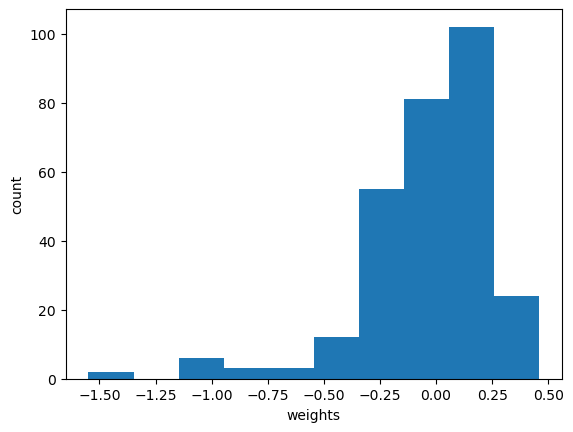

In [6]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel("weights")
plt.ylabel("count")
plt.show()

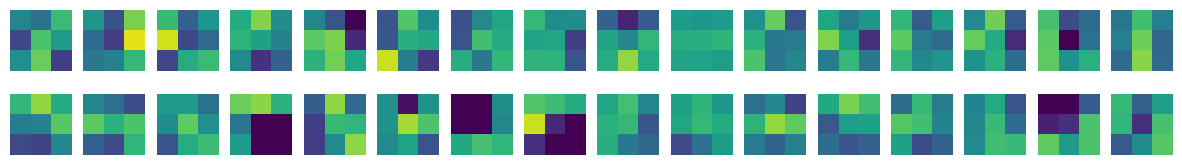

In [7]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
        axs[i,j].axis("off")
plt.show()

In [8]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size = 3, activation="relu", padding="same", input_shape=(28,28,1)))

/opt/homebrew/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
no_training_conv = no_training_model.layers[0]
no_training_conv.weights[0].shape

TensorShape([3, 3, 1, 32])

In [10]:
no_training_weights = no_training_conv.weights[0].numpy()
no_training_weights.mean(), no_training_weights.std()

(0.00062126253, 0.08363295)

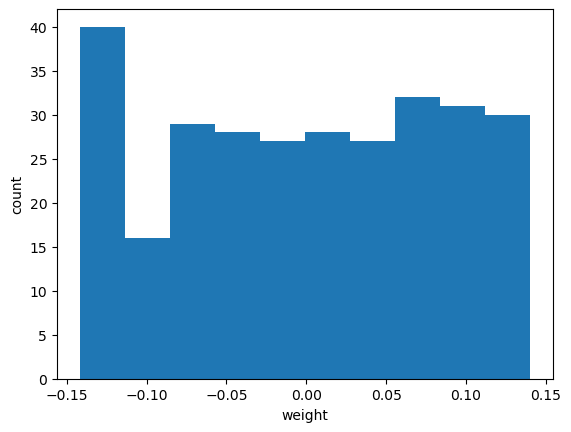

In [11]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel("weight")
plt.ylabel("count")
plt.show()

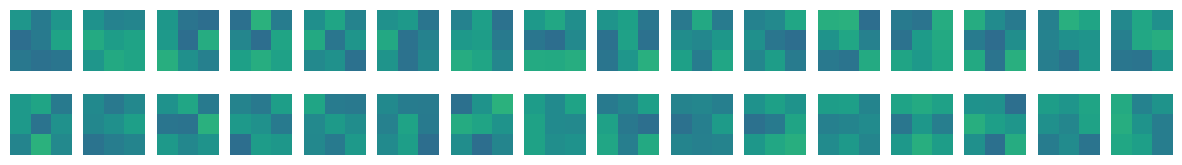

In [38]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
        axs[i,j].axis("off")
plt.show()